# How to Load DiffusionDB?

This notebook shows three methods to download and use a subset of data from DiffusionDB.

## Method 1. Hugging Face Datasets Loader

We can use the Hugging Face [`Datasets`](https://huggingface.co/docs/datasets/quickstart) library to easily load prompts and images from DiffusionDB.

We pre-defined 16 DiffusionDB subsets (configurations) based on the number of instances. You can see all subsets in the [Dataset Preview](https://huggingface.co/datasets/poloclub/diffusiondb/viewer/all/train).

|Config name|Number of Images|Number of Prompts|Number of Parameters|Is Random|
|:---|---:|---:|---:|---:|
|`all`|2M|2M|2M|No|
|`first_1k`|1k|1k|1k|No|
|`first_5k`|5k|5k|5k|No|
|`first_10k`|10k|10k|10k|No|
|`first_50k`|50k|50k|50k|No|
|`first_100k`|100k|100k|100k|No|
|`first_500k`|500k|500k|500k|No|
|`first_1m`|1m|1m|1m|No|
|`random_1k`|1k|1k|1k|yes|
|`random_5k`|5k|5k|5k|yes|
|`random_10k`|10k|10k|10k|yes|
|`random_50k`|50k|50k|50k|yes|
|`random_100k`|100k|100k|100k|yes|
|`random_500k`|500k|500k|500k|yes|
|`random_1m`|1m|1m|1m|yes|
|`text_only`|0|2M|2M|No|

**Note:** If you only need prompts (no images), we recommend using Method 3 instead of the `text_only` configuration here. It is much faster and more flexible to load the meatadata Parquet table ourselves than using the Hugging Face's Datasets Generator.

**Note:** To use this Datsets Loader, you need to install Pillow by `pip install Pillow`.

In [3]:
import numpy as np
from PIL import Image
from datasets import load_dataset

# Load the dataset with the `large_first_1k` subset
dataset = load_dataset('poloclub/diffusiondb', 'large_first_1k')

Found cached dataset diffusiondb (/Users/jaywang/.cache/huggingface/datasets/poloclub___diffusiondb/large_first_1k/0.9.1/547894e3a57aa647ead68c9faf148324098f47f2bc1ab6705d670721de9d89d1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# All data are stored in the `train` split
my_1k_data = dataset['train']
my_1k_data

Dataset({
    features: ['image', 'prompt', 'seed', 'step', 'cfg', 'sampler', 'width', 'height', 'user_name', 'timestamp', 'image_nsfw', 'prompt_nsfw'],
    num_rows: 1000
})

a beautifull white cast futuristic biomechanical humanoid woman side portrait with pretty face in intricate detailed color smashing fluid oilpaint, melting wax, thin fractal tendrils, futuristic digital painting, cyberpunk, 8 k, hyper detailed, octane render, concept art, by peter mohrbacher, by wlop, by ruan jia 


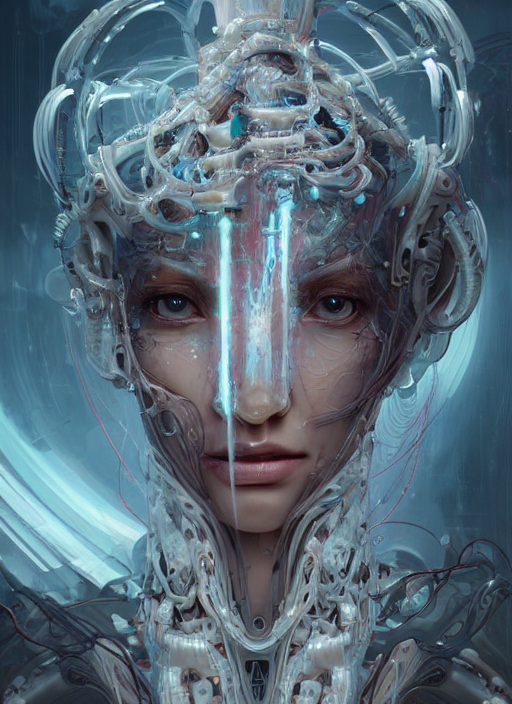

In [5]:
random_i = np.random.choice(range(my_1k_data.num_rows))

# Print out the prompt of this image
print(my_1k_data['prompt'][random_i])

# Display this image
image = my_1k_data['image'][random_i]
display(image)

## Method 2. Manually Download the Data

DiffusionDB uses a modularized file structure to organize images. The total 2 million images are split into 2,000 folders, where each folder has 1,000 images and a JSON file. Therefore, we can easily download a desired number of images with their prompts and hyperparameters.

All zip files have the following URL, where `{xxxxxx}` ranges from `000001` to `002000`.

`https://huggingface.co/datasets/poloclub/diffusiondb/resolve/main/images/part-{xxxxxx}.zip`


In [29]:
from urllib.request import urlretrieve
from json import load
from PIL import Image
from os.path import join

import numpy as np
import shutil


In [34]:
# Example to get data from part-000001
# Download part-000001.zip
part_id = 1
part_url = f'https://huggingface.co/datasets/poloclub/diffusiondb/resolve/main/images/part-{part_id:06}.zip'
urlretrieve(part_url, f'part-{part_id:06}.zip')

('part-000001.zip', <http.client.HTTPMessage at 0x145dc2fd0>)

In [25]:
# Unzip part-000001.zip
shutil.unpack_archive(f'part-{part_id:06}.zip', f'part-{part_id:06}')

{'p': 'symmetry!! a tiny cute chinese spring festival oriental tale mascot snake - phoenix toys, magic, intricate, smooth line, light dust, mysterious dark background, warm top light, hd, 8 k, smooth ， sharp high quality artwork in style of greg rutkowski, concept art, blizzard warcraft artwork, bright colors ', 'se': 75054762, 'c': 14.0, 'st': 50, 'sa': 'k_lms'}


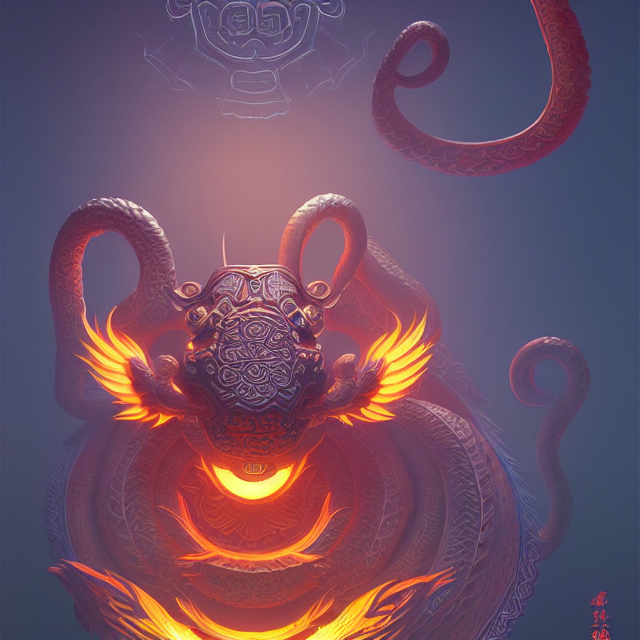

In [33]:
# Access the images and their prompts and hyperparameters
part_data = load(open(f'part-{part_id:06}/part-{part_id:06}.json', 'r', encoding='utf8'))

# Load the image
random_img_name = np.random.choice(list(part_data.keys()), 1)[0]
img = Image.open(join(f'part-{part_id:06}', random_img_name))

# Display the image with its prompt and hyperparameters
print(part_data[random_img_name])
display(img)


## Method 3. Use `metadata.parquet` (Text Only)

If our tasks do not require images, then we can easily access all 2 million prompts and hyperparameters in the `metadata.parquet` table.

In [6]:
from urllib.request import urlretrieve
import pandas as pd

In [7]:
# Download the parquet table
table_url = f'https://huggingface.co/datasets/poloclub/diffusiondb/resolve/main/metadata.parquet'
urlretrieve(table_url, 'metadata.parquet')

('metadata.parquet', <http.client.HTTPMessage at 0x1738b2250>)

In [8]:
# Read the table using Pandas
metadata_df = pd.read_parquet('metadata.parquet')
print(metadata_df.shape)
metadata_df.head()

(2000000, 13)


,image_name,prompt,part_id,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw
0,2217ccbd-a1c6-47ac-9a2d-79649727c834.png,"a portrait of a female robot made from code, v...",1,2615452544,50,7.0,8,512,512,0167cc490c3dc6047be855b096a9b9d8f20e2b034532bd...,2022-08-20 11:56:00+00:00,0.554853,0.001621
1,c78807b7-d55a-4a2d-a6b6-9192b18941ad.png,a portrait of a female robot made from a cloud...,1,4231506957,50,7.0,8,512,512,0167cc490c3dc6047be855b096a9b9d8f20e2b034532bd...,2022-08-20 11:59:00+00:00,0.153645,0.000707
2,dc71658a-5e4b-4dca-861a-e1535510348b.png,"only memories remain, trending on artstation",1,544607824,50,7.0,8,512,512,0167cc490c3dc6047be855b096a9b9d8f20e2b034532bd...,2022-08-20 12:02:00+00:00,0.062496,0.000425
3,48eb7e17-a3cf-4eb8-96a9-d8e3e23fa1af.png,dream swimming pool with nobody,1,3500509234,50,7.0,8,512,512,019084defdd44d2dfcd200bf7aaae53034263168e10d6b...,2022-08-20 07:22:00+00:00,0.030799,0.003586
4,601d9792-eccd-4850-97a7-edbe91d3464c.png,a dog doing weights. epic oil painting.,1,1312381211,50,12.0,8,512,768,03cb377ebf364ea2761b5710625974c0d2d25285fec982...,2022-08-20 12:28:00+00:00,0.181035,0.030822


Note that the `sampler` column has integer values. Each integer corresponds to one sampler. The mapping is shown below.

In [9]:
sampler_map = {
    1: "ddim",
    2: "plms",
    3: "k_euler",
    4: "k_euler_ancestral",
    5: "ddik_heunm",
    6: "k_dpm_2",
    7: "k_dpm_2_ancestral",
    8: "k_lms",
    9: "others",
}

In [10]:
# If we only need prompts, we can read the `prompt` column without reading the
# whole table!
prompts = pd.read_parquet('metadata.parquet', columns=['prompt'])
print(prompts.shape)
prompts.head()

(2000000, 1)


,prompt
0,"a portrait of a female robot made from code, v..."
1,a portrait of a female robot made from a cloud...
2,"only memories remain, trending on artstation"
3,dream swimming pool with nobody
4,a dog doing weights. epic oil painting.
